### Student Information
Name: 蔡岳洋

Student ID: 111164514

GitHub ID: KetchupLeader

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [2]:
import sys
print(sys.path)
sys.path.append("D:\\Users\\User\\Desktop\\school\\data mining\\DMLab1\\DM2023-Lab1-Master")
%load_ext autoreload
%autoreload 2

['C:\\Users\\Michael', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\python39.zip', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\DLLs', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib', 'C:\\Users\\Michael\\anaconda3\\envs\\py3', '', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib\\site-packages', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib\\site-packages\\win32', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Michael\\anaconda3\\envs\\py3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Michael\\.ipython']


In [3]:
 %reload_ext autoreload

In [81]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

##  Exercise 2 (take home)
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [6]:
#Query by category value, show first 10
X[X["category"]==1][:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics


## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.

hint: why .isnull() didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

First to know what happened here we have to know what isnull does.
It checks if the item exists.

A is null since the key missing_example is set to null.\
B is null since the key missing_example doesn't exist, thus the value is null.\
C is false because a string is appointed to the key missing_example.\
D is false because same as above.\
E is true because None is null in python.\
F is false because an empty string is the value.

## Exercise 6 (take home):
Notice any changes from the X dataframe to the X_sample dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
print(X_sample.shape)
display(X)
display(X_sample)

(2257, 3)
(1000, 3)


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [10]:
#print(list(set(X["category"])))
#print(list(set(X_sample["category_name"])))
#X.isnull().apply(lambda x: dmh.check_missing_values(x))
#X_sample.isnull().apply(lambda x: dmh.check_missing_values(x))
for x in list(set(X_sample["category_name"])):
    print()
    print("Percentage of "+x)    
    print("X: "+str(len(X[X["category_name"]==x])/len(X)))
    print("X_sample: "+str(len(X_sample[X_sample["category_name"]==x])/len(X_sample)))


Percentage of comp.graphics
X: 0.25875055383252105
X_sample: 0.247

Percentage of soc.religion.christian
X: 0.2653965440850687
X_sample: 0.27

Percentage of sci.med
X: 0.2631812140008861
X_sample: 0.277

Percentage of alt.atheism
X: 0.21267168808152415
X_sample: 0.206


### Answer
First thing I notice is that the length of X and X_sample is different and the X_sample seemed to be out of order. Other than that nothing extrodinary can be seen at first glance.
Next I decided to check for category_name, category difference and null or duplicated records just in case.
Then I decided to compare the distribution of category_name in both samples.
But both still looks similar.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

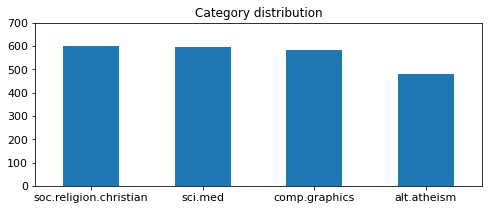

In [13]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

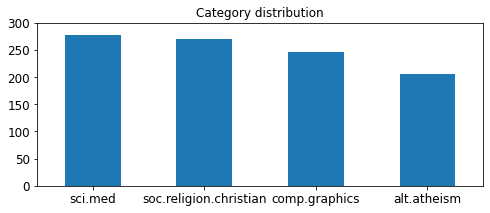

In [14]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

##  Exercise 8 (take home)

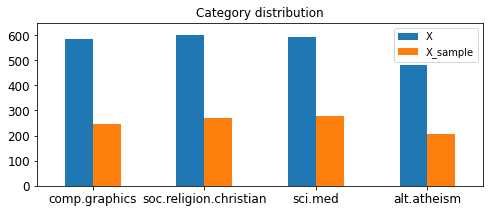

In [15]:
tempNamels = list(set(X_sample["category_name"]))
tempX_Data = []
tempX_sample_Data = []
for x in tempNamels:
    tempX_Data.append(len(X[X["category_name"]==x]))
    tempX_sample_Data.append(len(X_sample[X_sample["category_name"]==x]))
tempDataFrame = pd.DataFrame({"X":tempX_Data,"X_sample":tempX_sample_Data},index=tempNamels)
tempMax = max([i for i in tempX_Data+tempX_sample_Data])+50
tempDataFrame.plot(kind = 'bar',title = 'Category distribution',ylim = [0, tempMax], rot = 0, fontsize = 12, figsize = (8,3))
tempX_Data = tempX_sample_Data = tempDataFrame = tempMax = None

## Exercise 10 (take home)
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
import nltk
# Alreadly downloaded
#nltk.download('punkt')

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 

analyze = count_vect.build_analyzer()

In [17]:
count_vect.get_feature_names_out()[0:10]
X_counts.shape
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Answer
Since we know we only need to get the fifth array and we need the location of the seconde 1 that appears.\
We could get the array with `X_counts[4, 0:100].toarray()[0]`\
`np.where(X_counts[4, 0:100].toarray()[0] == 1)[0]` will show all the index of 1 in the array, we could ignore the first and grab the second with `[1]` at the end.\
The result will be 37

In [18]:
print(count_vect.get_feature_names_out()[np.where(X_counts[4, 0:100].toarray()[0] == 1)[0][1]])

01


## Exercise 11 (take home)
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [19]:
import seaborn as sns


plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
#print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
#print(plot_y)

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
#print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#display(df_todraw)
#plt.subplots(figsize=(9, 7))
#ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)


In [20]:
plot_z[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Answer
If we were to directly remove the limit of 20 items, the matrix would be to large and not very useful.


In [21]:
'''
#stupid way 
tempArray = X_counts.toarray()
templs = [0]*(X_counts.shape[1])
print(len(templs))
for arrayItem in tempArray:
    for index2, item in enumerate(arrayItem):
        if(item!=0):
            templs[index2] = templs[index2]+1
'''

'\n#stupid way \ntempArray = X_counts.toarray()\ntempls = [0]*(X_counts.shape[1])\nprint(len(templs))\nfor arrayItem in tempArray:\n    for index2, item in enumerate(arrayItem):\n        if(item!=0):\n            templs[index2] = templs[index2]+1\n'

In [214]:
'''
#stupid way 
tempTermls = []
tempCountls = []
tempIndexls = []
tempA = (sorted(range(len(templs)), key=lambda i: templs[i])[-20:])
for x in tempA:
    tempTermls.append(count_vect.get_feature_names_out()[x])
    tempCountls.append(templs[x])
    tempIndexls.append(x)
    print(count_vect.get_feature_names_out()[x] + " " + str(templs[x]) + " " + str(x))
'''

'\n#stupid way \ntempTermls = []\ntempCountls = []\ntempIndexls = []\ntempA = (sorted(range(len(templs)), key=lambda i: templs[i])[-20:])\nfor x in tempA:\n    tempTermls.append(count_vect.get_feature_names_out()[x])\n    tempCountls.append(templs[x])\n    tempIndexls.append(x)\n    print(count_vect.get_feature_names_out()[x] + " " + str(templs[x]) + " " + str(x))\n'

In [40]:
tempFreq = np.array(X_counts.toarray().sum(axis=0))
tempTopFreq = sorted(range(len(tempFreq)), key=lambda i: tempFreq[i])[-20:][::-1]
topTerm = []
for x in tempTopFreq:
    topTerm.append(count_vect.get_feature_names_out()[x])
print(topTerm)

['the', 'of', 'to', 'and', 'is', 'in', 'that', 'it', 'you', 'for', 'not', 'this', 'be', 'from', 'are', 'edu', 'have', 'as', 'on', 'with']


,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,term_not,term_this,term_be,term_from,term_are,term_edu,term_have,term_as,term_on,term_with
doc_561,2,2,2,2,2,1,0,1,0,0,1,0,2,1,0,2,0,0,0,0
doc_440,10,5,2,0,3,5,2,0,0,0,1,0,1,1,0,1,0,1,1,0
doc_1513,26,20,23,5,17,15,11,8,7,7,2,3,4,2,5,1,6,7,4,1
doc_1360,6,7,10,2,4,5,5,4,2,0,1,4,0,1,0,0,2,1,0,1
doc_259,2,1,2,3,1,0,3,3,1,0,0,2,1,1,0,2,0,0,1,0
doc_535,17,8,8,4,11,5,15,6,6,1,7,9,2,2,7,2,0,2,2,7
doc_809,12,6,1,0,3,3,0,3,3,0,0,1,1,3,0,0,1,1,1,1
doc_2002,17,9,9,5,3,4,5,3,1,1,1,3,1,1,0,1,1,1,0,3
doc_2166,5,3,6,4,4,1,1,2,0,0,1,1,2,2,2,2,4,0,4,1
doc_1272,19,10,6,12,6,14,6,2,0,1,3,1,1,1,10,2,1,0,4,1


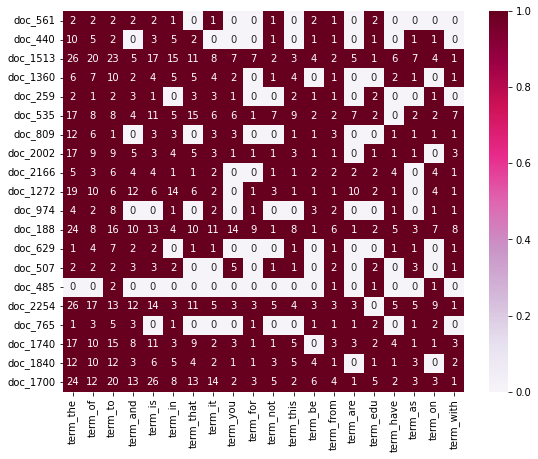

In [24]:
plot_x = ["term_"+str(i) for i in topTerm]
#print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(X_sample.index)][:20]
#print(plot_y)

#Get 20 items of top freq index
plot_z = X_counts[X_sample.index].toarray()[:,tempTopFreq][:20] 
#print(plot_z)
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

In [25]:
tempFreq = tempTopFreq = topTerm = None

## Exercise 12 (take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [26]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

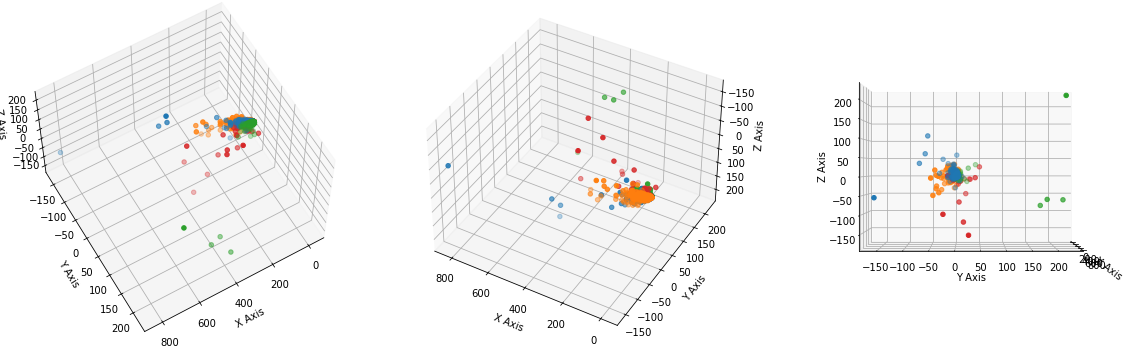

In [27]:
temp3D = PCA(n_components=3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
tempAxls = [ax1, ax2, ax3]
for c, category in zip(col, categories):
    xAxis = temp3D[X['category_name'] == category].T[0]
    yAxis = temp3D[X['category_name'] == category].T[1]
    zAxis = temp3D[X['category_name'] == category].T[2]   
    for x in tempAxls:
        x.scatter(xAxis, yAxis, zAxis)

for x in tempAxls:
    x.set_xlabel('X Axis')
    x.set_ylabel('Y Axis')
    x.set_zlabel('Z Axis')

ax1.view_init(60, 60) 
ax2.view_init(-140, 60) 
ax3.view_init(0, 0) 
plt.show()
temp3D = col = fig = ax1 = ax2 = ax3 = tempAxls = xAxis = yAxis = zAxis = None

### Answer
Pretty much all of the dots are in the same area.

##  Exercise 13 (take home):

In [28]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

In [29]:
import plotly.express as px  

In [43]:
data = {"Term": count_vect.get_feature_names_out()[:300], "Frequency": term_frequencies[:300]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
# showing the plot 
fig.show()

In [59]:
numOfTerms = 10
tempFreq = np.array(X_counts.toarray().sum(axis=0))
tempTopFreq = np.argsort(-tempFreq)[:numOfTerms]
topTerm = []
for x in tempTopFreq:
    topTerm.append(count_vect.get_feature_names_out()[x])
data = {"Term": topTerm, "Frequency": tempTopFreq}
#data = {"Term": count_vect.get_feature_names_out()[:numOfTerms], "Frequency": term_frequencies[:numOfTerms]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
fig.show()
tempFreq = tempTopFreq =numOfTerms = topTerm = None

## Exercise 15 (take home)

In [73]:
numOfTerms = 300
tempSort = np.argsort(term_frequencies)[::-1]
tempFreq = term_frequencies[tempSort]
data = {"Term": count_vect.get_feature_names_out()[tempSort[:numOfTerms]], "Frequency": tempFreq[:numOfTerms]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
fig.show()
tempFreq = tempTopFreq =numOfTerms = topTerm = None

## Exercise 16 (take home)

In [74]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [78]:
X["temp_category_name"] = mlb.transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,unigrams,temp_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


----------

************

# Part Two

In [90]:
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as tas
import os.path
import os
#os.chdir("My workspace path")

## 2. Data preparation & 3. Data Transformation

In [341]:
amazon_file  = "./sentiment labelled sentences/amazon_cells_labelled.txt"
imdb_file = "./sentiment labelled sentences/imdb_labelled.txt"
yelp_file = "./sentiment labelled sentences/yelp_labelled.txt"
'''
# somthing wrong with imdb, I could manually fix it but nah
data_amazon =  pd.read_csv(amazon_file, sep='\t', header=None)
print(len(data_amazon))
#imdb will be corrupted
data_imdb =  pd.read_csv(imdb_file, sep='\t', header=None,encoding='utf-8', engine='python', quotechar='"')
print(len(data_imdb))
data_yelp =  pd.read_csv(yelp_file, sep='\t', header=None)
print(len(data_yelp))
data_combine = pd.concat([data_amazon, data_imdb, data_yelp], ignore_index=True)
'''
tempTexts = []
tempScores = []
tempSources = []
with open(amazon_file, "r") as f:
    for line in f.readlines():
        l = line.split('\t')
        tempTexts.append(l[0])
        tempScores.append(int(l[1].rstrip()))
        tempSources.append("amazon")      
with open(imdb_file, "r") as f:
    for line in f.readlines():
        l = line.split('\t')
        tempTexts.append(l[0])
        tempScores.append(int(l[1].rstrip()))
        tempSources.append("imdb")     
with open(yelp_file, "r") as f:
    for line in f.readlines():
        l = line.split('\t')
        tempTexts.append(l[0])
        tempScores.append(int(l[1].rstrip()))
        tempSources.append("yelp")  
data_combine = pd.DataFrame({"Text": tempTexts, "Score": tempScores,"Source":tempSources})
data_combine.columns=["Text", "Score", "Source"]
print(data_combine.shape)
data_combine[:10]

(3000, 3)


,Text,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


## 4. Data Mining using Pandas

In [342]:
print("Check for nulls")
print(data_combine.isnull().apply(lambda x: dmh.check_missing_values(x)))
#np.where(data_combine.applymap(lambda x: x == ''))
print("Check for duplicates")
print("Duplicate Exist: "+ str(sum(data_combine.duplicated("Text",keep=False))))


Check for nulls
                                 Text                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               Source  
0  The amoung of missing records is:   
1                                   0  
Check for duplicates
Duplicate Exist: 34


In [343]:
# duplicate exist so we get rid of
print(data_combine[data_combine.duplicated("Text",keep=False)])
# check if score is different in duplicates
print(len(data_combine[data_combine.duplicated(["Text","Score"])])==(sum(data_combine.duplicated("Text"))))
# they are the same, so we remove them
print(len(data_combine))

data_combine.drop_duplicates(keep="last", inplace=True)
print(len(data_combine))

                                                   Text  Score  Source
18                                        Works great!.      1  amazon
179   If you like a loud buzzing to override all you...      0  amazon
180                             Don't buy this product.      0  amazon
187                                       Great phone!.      1  amazon
262                                        Works great.      1  amazon
285                                       Great phone!.      1  amazon
290                                        Great Phone.      1  amazon
392                               This is a great deal.      1  amazon
402                    Excellent product for the price.      1  amazon
407                                        Works great.      1  amazon
446                                       Does not fit.      0  amazon
524                                       Works great!.      1  amazon
543                             Don't buy this product.      0  amazon
647   

## 5. Data Preprocessing

In [344]:
# generate sample set
data_combine_sampleSet = data_combine.sample(n=1000) 

<Axes: title={'center': 'Score distribution'}>

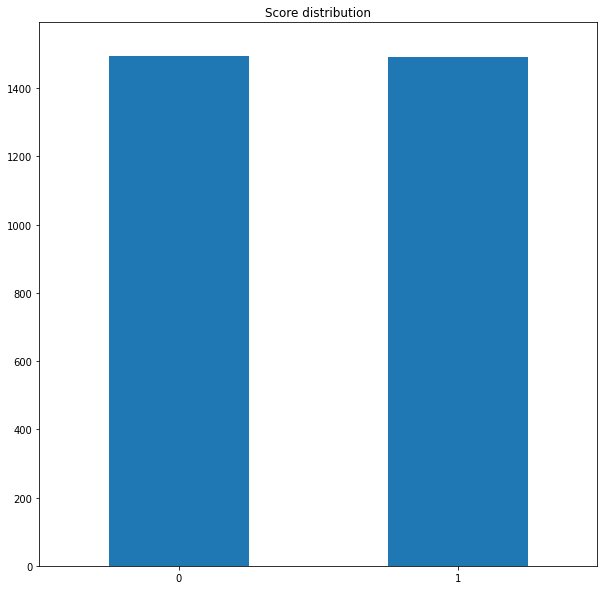

In [345]:
display(data_combine.Score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, max(data_combine.Score.value_counts())+100],        
                                    rot = 0, fontsize = 10, figsize = (10,10)))



<Axes: title={'center': 'Score distribution'}>

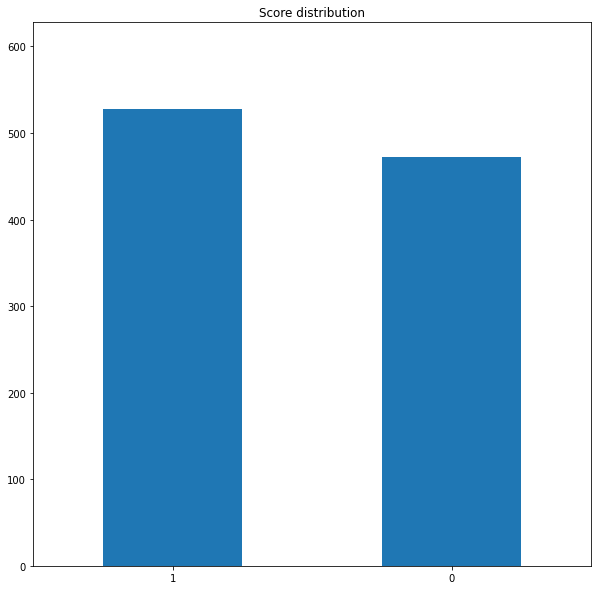

In [346]:
display(data_combine_sampleSet.Score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, max(data_combine_sampleSet.Score.value_counts())+100],        
                                    rot = 0, fontsize = 10, figsize = (10,10)))

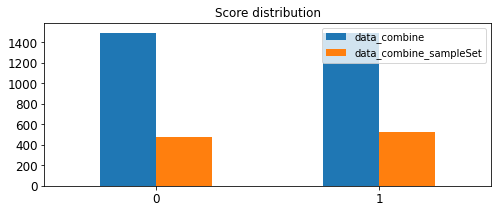

In [349]:

tempDataFrame = pd.DataFrame({"data_combine":data_combine.Score.value_counts(),"data_combine_sampleSet":data_combine_sampleSet.Score.value_counts()},index=[0,1])
tempMax = max([i for i in data_combine.Score.value_counts()])+100
tempDataFrame.plot(kind = 'bar',title = 'Score distribution',ylim = [0, tempMax], rot = 0, fontsize = 12, figsize = (8,3))
tempDataFrame = None

In [350]:
import nltk
#nltk.download('punkt')

In [351]:
data_combine["unigrams"] = data_combine["Text"].apply(lambda x: dmh.tokenize_text(x))

In [352]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data_combine.Text)
#print(data_counts.shape)
#print(data_counts[0])
analyze = count_vect.build_analyzer()
#analyze(data_combine.Text[0])

In [353]:
tempFreq = np.array(data_counts.toarray().sum(axis=0))
tempTopFreq = sorted(range(len(tempFreq)), key=lambda i: tempFreq[i])[-20:][::-1]
topTerm = []
for x in tempTopFreq:
    topTerm.append(count_vect.get_feature_names_out()[x])
print(topTerm)

['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'great', 'but']


In [354]:
topTerm

['the',
 'and',
 'it',
 'is',
 'to',
 'this',
 'of',
 'was',
 'in',
 'for',
 'that',
 'not',
 'with',
 'my',
 'very',
 'good',
 'on',
 'you',
 'great',
 'but']

,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,term_that,term_not,term_with,term_my,term_very,term_good,term_on,term_you,term_great,term_but
doc_0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
doc_2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
doc_3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
doc_5,1,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0
doc_7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0
doc_8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
doc_9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


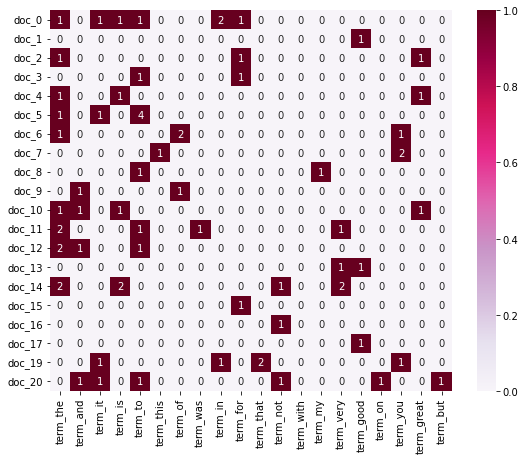

In [355]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in topTerm]
plot_y = ["doc_"+ str(i) for i in list(data_combine.index)][:20]
plot_z = data_counts.toarray()[:,tempTopFreq][:20] 
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

In [356]:
from sklearn.decomposition import PCA

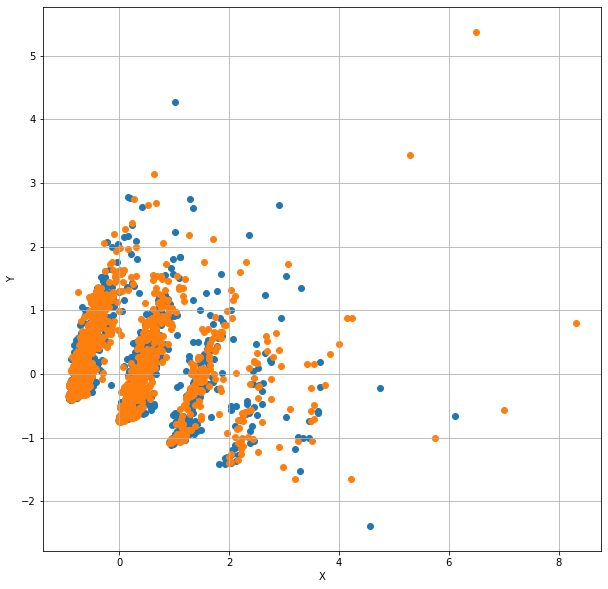

In [357]:

from sklearn.decomposition import PCA

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

col = ['coral', 'blue']

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
for c, scoreVal in zip(col, [0, 1]):
    xAxis = data_reduced[data_combine['Score'] == scoreVal].T[0]
    yAxis = data_reduced[data_combine['Score'] == scoreVal].T[1]   
    ax.scatter(xAxis, yAxis)

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

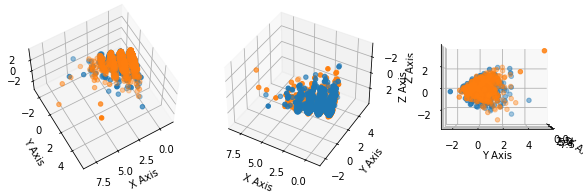

In [358]:
col = ['coral', 'blue']
temp3D = PCA(n_components=3).fit_transform(data_counts.toarray())
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
tempAxls = [ax1, ax2, ax3]
for c, scoreVal in zip(col, [0, 1]):
    xAxis = temp3D[data_combine["Score"] == scoreVal].T[0]
    yAxis = temp3D[data_combine["Score"] == scoreVal].T[1]
    zAxis = temp3D[data_combine["Score"] == scoreVal].T[2]   
    for x in tempAxls:
        x.scatter(xAxis, yAxis, zAxis)

for x in tempAxls:
    x.set_xlabel('X Axis')
    x.set_ylabel('Y Axis')
    x.set_zlabel('Z Axis')

ax1.view_init(60, 60) 
ax2.view_init(-140, 60) 
ax3.view_init(0, 0) 
plt.show()
temp3D = col = fig = ax1 = ax2 = ax3 = tempAxls = xAxis = yAxis = zAxis = None

In [361]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [362]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

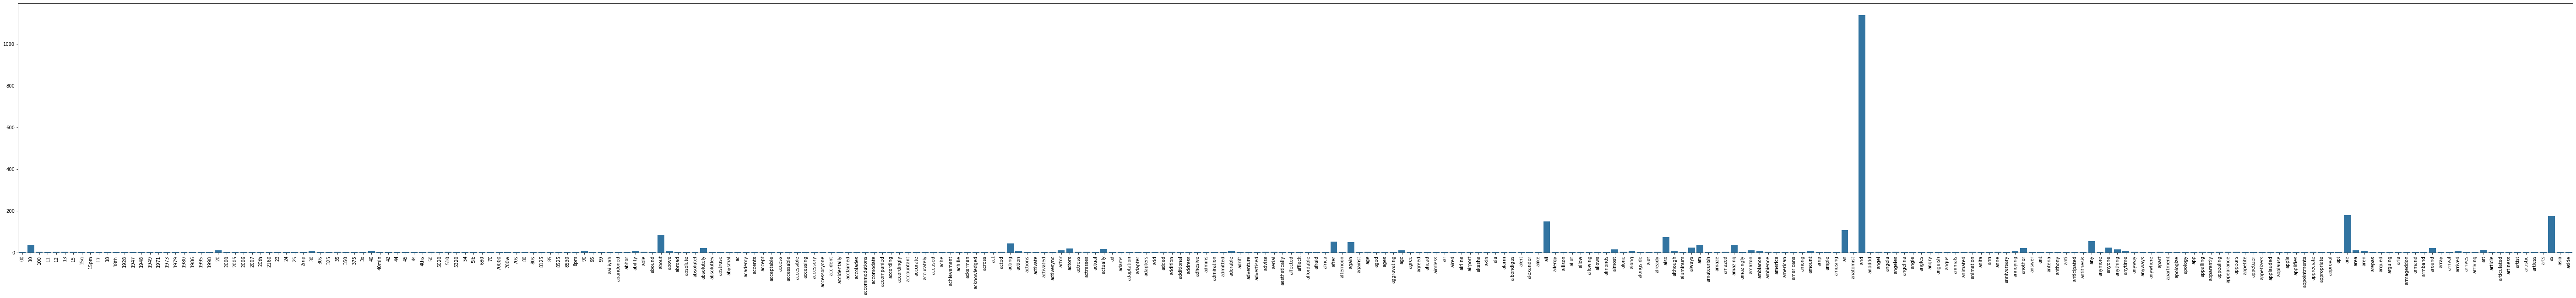

In [369]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.xaxis.set_ticks(count_vect.get_feature_names_out()[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [370]:
data = {"Term": count_vect.get_feature_names_out()[:300], "Frequency": term_frequencies[:300]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
# showing the plot 
fig.show()

In [371]:
numOfTerms = 10
tempFreq = np.array(data_counts.toarray().sum(axis=0))
tempTopFreq = np.argsort(-tempFreq)[:numOfTerms]
topTerm = []
for x in tempTopFreq:
    topTerm.append(count_vect.get_feature_names_out()[x])
data = {"Term": topTerm, "Frequency": tempTopFreq}
#data = {"Term": count_vect.get_feature_names_out()[:numOfTerms], "Frequency": term_frequencies[:numOfTerms]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
fig.show()
tempFreq = tempTopFreq =numOfTerms = topTerm = None

In [372]:
numOfTerms = 300
tempSort = np.argsort(term_frequencies)[::-1]
tempFreq = term_frequencies[tempSort]
data = {"Term": count_vect.get_feature_names_out()[tempSort[:numOfTerms]], "Frequency": tempFreq[:numOfTerms]}
df = pd.DataFrame(data)
fig = px.bar(df,x="Term", y="Frequency")
  
fig.show()
tempFreq = tempTopFreq =numOfTerms = topTerm = None